In [1]:
import pandas as pd
import numpy as np
import altair as alt
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
file_path = '/content/US Superstore data.xls'

df = pd.read_excel(file_path)
df = df.set_index('Row ID')
display(df.head(15))

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Row ID,,,,,,,,,,,,,,,,,,,,
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
6,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
7,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.2800,4,0.00,1.9656
8,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.1520,6,0.20,90.7152
9,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.5040,3,0.20,5.7825


In [42]:

#ex2

df = pd.read_excel('US Superstore data.xls', sheet_name='Orders')


df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Year'] = df['Order Date'].dt.year


sales_by_year = df.groupby('Year')['Sales'].sum().reset_index()

chart = alt.Chart(sales_by_year).mark_line().encode(
    x='Year:O',
    y='Sales:Q',
    tooltip=['Year', 'Sales']
).properties(
    title='Sales Trends Over Years',
    width=600,
    height=400
).interactive()

chart.display()

alt.Chart(...)

-This line chart illustrates the **total sales** of the US Superstore over different years. The horizontal axis represents the year, while the vertical axis shows the corresponding sales amount.

-The line depicts the evolution of sales figures from one year to the next,
allowing for the observation of overall sales patterns and growth over time

In [47]:
#ex2
import pandas as pd
import altair as alt
from vega_datasets import data

df = pd.read_excel('US Superstore data.xls', sheet_name='Orders')
sales_by_state = df.groupby('State')['Sales'].sum().reset_index()


state_to_id = {
    'Alabama': 1, 'Alaska': 2, 'Arizona': 4, 'Arkansas': 5, 'California': 6,
    'Colorado': 8, 'Connecticut': 9, 'Delaware': 10, 'Florida': 12, 'Georgia': 13,
    'Hawaii': 15, 'Idaho': 16, 'Illinois': 17, 'Indiana': 18, 'Iowa': 19,
    'Kansas': 20, 'Kentucky': 21, 'Louisiana': 22, 'Maine': 23, 'Maryland': 24,
    'Massachusetts': 25, 'Michigan': 26, 'Minnesota': 27, 'Mississippi': 28,
    'Missouri': 29, 'Montana': 30, 'Nebraska': 31, 'Nevada': 32, 'New Hampshire': 33,
    'New Jersey': 34, 'New Mexico': 35, 'New York': 36, 'North Carolina': 37,
    'North Dakota': 38, 'Ohio': 39, 'Oklahoma': 40, 'Oregon': 41, 'Pennsylvania': 42,
    'Rhode Island': 44, 'South Carolina': 45, 'South Dakota': 46, 'Tennessee': 47,
    'Texas': 48, 'Utah': 49, 'Vermont': 50, 'Virginia': 51, 'Washington': 53,
    'West Virginia': 54, 'Wisconsin': 55, 'Wyoming': 56
}


sales_by_state['id'] = sales_by_state['State'].map(state_to_id)


states = alt.topo_feature(data.us_10m.url, 'states')


chart = alt.Chart(states).mark_geoshape().encode(
    color='Sales:Q',
    tooltip=['id:O', 'Sales:Q']
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(sales_by_state, 'id', ['Sales'])
).properties(
    width=800,
    height=500,
    title='Sales Distribution by State in the US'
).project('albersUsa')


chart.display()

alt.Chart(...)

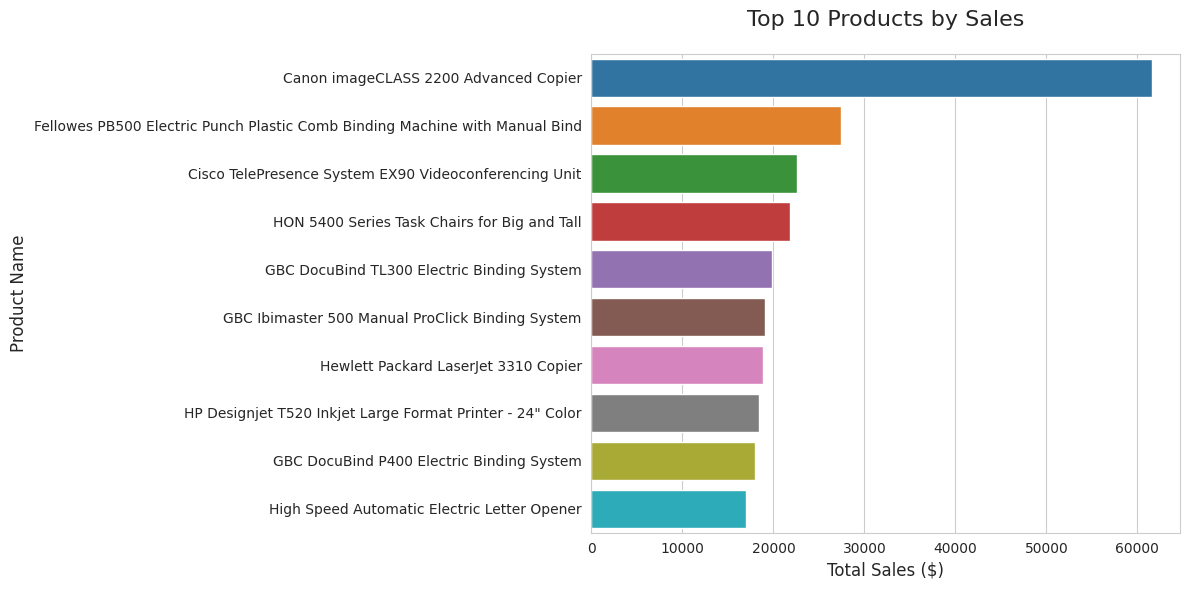

In [61]:
#ex3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

product_sales = df.groupby('Product Name')['Sales'].sum().reset_index()
top_10_products = product_sales.nlargest(10, 'Sales')


sns.set_style("whitegrid")

plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_products, x='Sales', y='Product Name', hue='Product Name', legend=False)
plt.title('Top 10 Products by Sales', fontsize=16, pad=20)  # Заголовок
plt.xlabel('Total Sales ($)', fontsize=12)  # Подпись оси X
plt.ylabel('Product Name', fontsize=12)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()


In [63]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


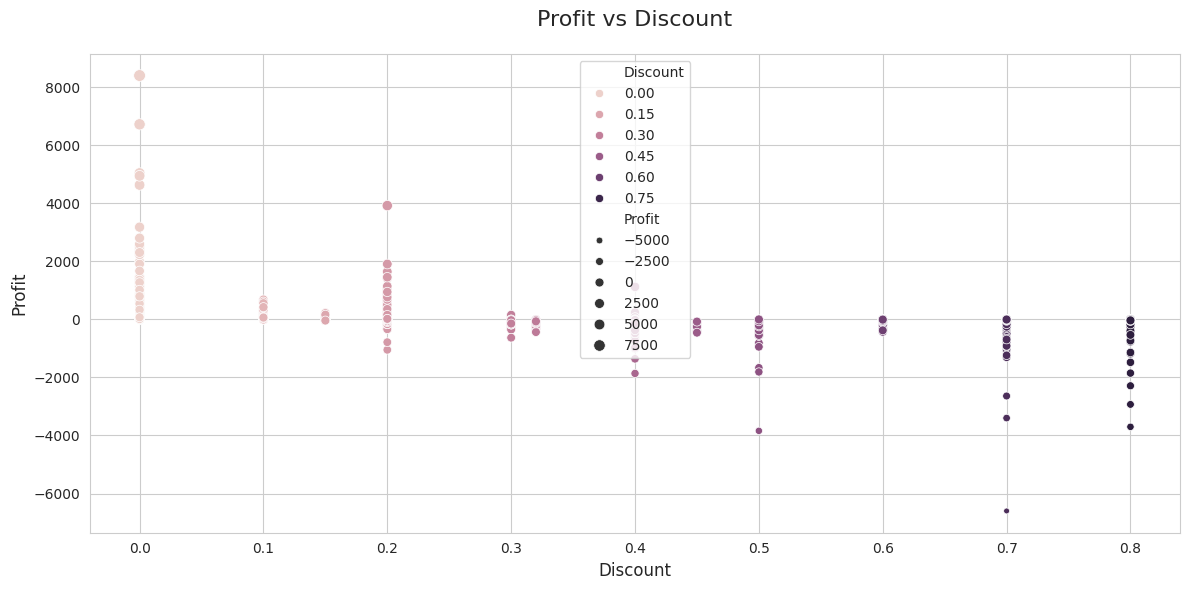

In [71]:
#ex3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


sns.set_style("whitegrid")


plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Discount', y='Profit', hue='Discount', size='Profit')


plt.title('Profit vs Discount', fontsize=16, pad=20)
plt.xlabel('Discount', fontsize=12)
plt.ylabel('Profit', fontsize=12)

plt.tight_layout()
plt.show()

###Comparative Analysis

####Matplotlib:


*   Line chart: Showed sales growth from 2014 to 2017 with interactive zooming.
*   Map: Highlighted high sales in California, with tooltips for exact figures.

####Seaborn:
* Bar chart: Identified Canon imageCLASS 2200 as top
* product ($61,599.824), far ahead of others.
Scatter plot: Revealed high discounts (0.7–0.8) often lead to losses (Profit < 0).

###Ease of Use and Effectiveness
####Matplotlib:
* More code for customization (e.g., label rotation); complex for maps (needs state ID mapping).
* Effective for interactive maps and trends but time-consuming to style.

####Seaborn:
* Simpler code with automatic styling (e.g., sns.set_style()); scatter plot easily used hue and size.
* More effective for quick, polished standard charts but lacks interactivity.

###Conclusion
Matplotlib suits complex, interactive visuals; Seaborn is faster for standard, clear charts.